In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Lab 2

In [2]:
# Show the dataframe shape.

df = pd.read_csv("marketing_customer_analysis.csv")
df.shape

(9134, 24)

In [3]:
# Standardize header names

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
cols = [col_name.lower().replace(" ", "_") for col_name in df.columns]
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [6]:
df.columns = cols
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [8]:
# Which columns are numerical?

In [9]:
df.select_dtypes(include=['float','int']).columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [10]:
# Which columns are categorical?

In [11]:
df.select_dtypes(include=['object']).columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [12]:
# Check and deal with NaN values.

In [13]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [14]:
df.state.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [15]:
df[["state"]] = df[["state"]].fillna("Unknown")

In [16]:
df.state.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [17]:
df.response.value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [18]:
df[["response"]] = df[["response"]].fillna("No")

In [19]:
df.months_since_last_claim.value_counts()

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months_since_last_claim, dtype: int64

In [20]:
df.months_since_last_claim.mean()

15.097000218962119

In [21]:
df["months_since_last_claim"] = df["months_since_last_claim"].fillna(df.months_since_last_claim.mean())

In [22]:
df.months_since_last_claim.value_counts()

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months_since_last_claim, dtype: int64

In [23]:
df.number_of_open_complaints.value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [24]:
df[["number_of_open_complaints"]] = df[["number_of_open_complaints"]].fillna(0)

In [25]:
df.vehicle_class.value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [26]:
df[["vehicle_class"]] = df[["vehicle_class"]].fillna("Unknown")

In [27]:
df.vehicle_size.value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [28]:
df[["vehicle_size"]] = df[["vehicle_size"]].fillna("Medsize")

In [29]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [30]:
# Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [31]:
df["effective_to_date"] = df["effective_to_date"].astype("datetime64[ns]")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [33]:
df["month"] = pd.DatetimeIndex(df["effective_to_date"]).month

In [34]:
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [35]:
quarter1 = [1, 2, 3]
first_quarter = df[df.month.isin(quarter1)]

In [36]:
first_quarter.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [37]:
# BONUS: Put all the previously mentioned data transformations into a function.

In [38]:
def datatrans():
    import pandas as pd
    df = pd.read_csv("marketing_customer_analysis.csv")
    cols = [col_name.lower().replace(" ", "_") for col_name in df.columns]
    df.columns = cols
    df[["state"]] = df[["state"]].fillna("Unknown")
    df[["response"]] = df[["response"]].fillna("No")
    df[["months_since_last_claim"]] = df[["months_since_last_claim"]].fillna("df.months_since_last_claim.mean()")
    df[["number_of_open_complaints"]] = df[["number_of_open_complaints"]].fillna(0)
    df[["vehicle_class"]] = df[["vehicle_class"]].fillna("Unknown")
    df[["vehicle_size"]] = df[["vehicle_size"]].fillna("Medsize")
    df["effective_to_date"] = df["effective_to_date"].astype("datetime64[ns]")
    df["month"] = pd.DatetimeIndex(df["effective_to_date"]).month
    quarter1 = [1, 2, 3]
    first_quarter = df[df.month.isin(quarter1)]
    return df, first_quarter
    

In [39]:
datatrans()

(     customer       state  customer_lifetime_value response  coverage  \
 0     BU79786  Washington              2763.519279       No     Basic   
 1     QZ44356     Arizona              6979.535903       No  Extended   
 2     AI49188      Nevada             12887.431650       No   Premium   
 3     WW63253  California              7645.861827       No     Basic   
 4     HB64268  Washington              2813.692575       No     Basic   
 ...       ...         ...                      ...      ...       ...   
 9129  LA72316  California             23405.987980       No     Basic   
 9130  PK87824  California              3096.511217      Yes  Extended   
 9131  TD14365  California              8163.890428       No  Extended   
 9132  UP19263  California              7524.442436       No  Extended   
 9133  Y167826  California              2611.836866       No  Extended   
 
      education effective_to_date employmentstatus gender  income  ...  \
 0     Bachelor        2011-02-24   

# Lab 3 

In [40]:
# Show DataFrame info.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [42]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [43]:
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


In [44]:
# Show a plot of the total number of responses.

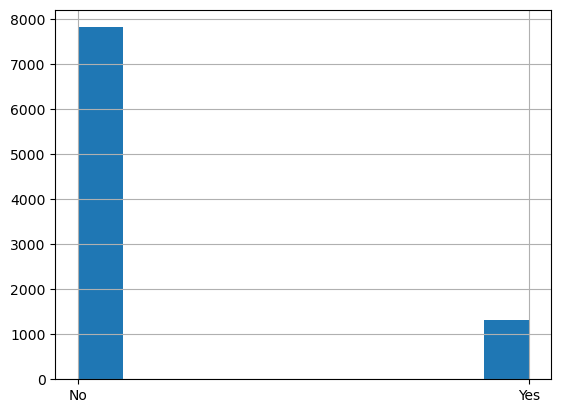

In [45]:
df['response'].hist()
plt.show()

In [46]:
#Show a plot of the response rate by the sales channel.

In [47]:
df.sales_channel.value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

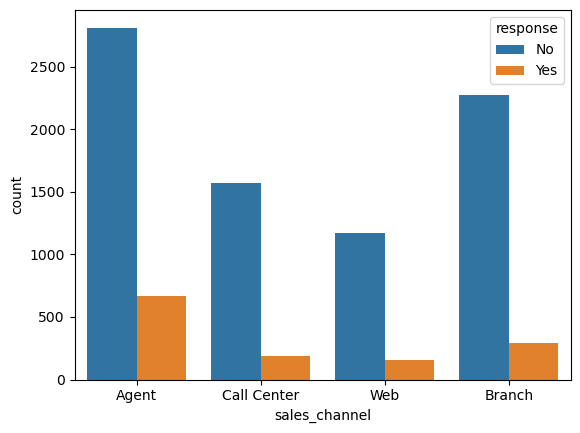

In [48]:
sns.countplot("sales_channel", hue = "response", data = df)

In [49]:
sales_response = df.groupby("sales_channel")["response"].value_counts(normalize=True).mul(100)
sales_response


sales_channel  response
Agent          No          80.845557
               Yes         19.154443
Branch         No          88.546942
               Yes         11.453058
Call Center    No          89.121813
               Yes         10.878187
Web            No          88.226415
               Yes         11.773585
Name: response, dtype: float64

<AxesSubplot:xlabel='sales_channel,response'>

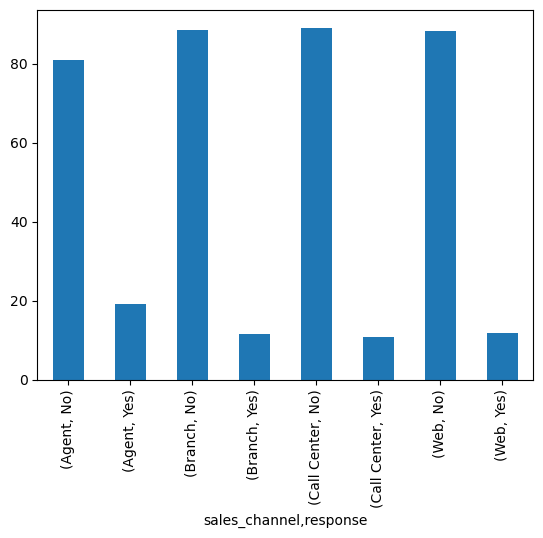

In [50]:
sales_response.plot(kind="bar")


In [51]:
#Show a plot of the response rate by the total claim amount.

In [52]:
bins = pd.cut(df.total_claim_amount, [0, 500, 1000, 1500, 2000, 2500, 3000])
claim_response = df.groupby(bins)["response"].value_counts(normalize=True).mul(100)
claim_response


total_claim_amount  response
(0, 500]            No           86.233640
                    Yes          13.766360
(500, 1000]         No           84.421715
                    Yes          15.578285
(1000, 1500]        No           82.195846
                    Yes          17.804154
(1500, 2000]        No          100.000000
(2000, 2500]        No          100.000000
(2500, 3000]        No          100.000000
Name: response, dtype: float64

<AxesSubplot:xlabel='total_claim_amount,response'>

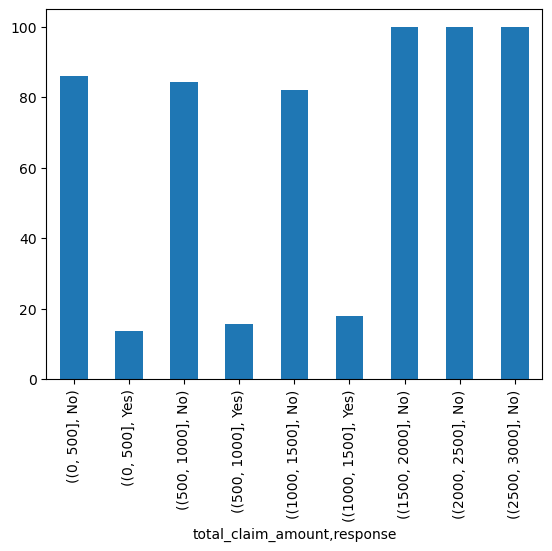

In [53]:
claim_response.plot(kind="bar")

In [54]:
#Show a plot of the response rate by income.

In [55]:
bins2 = pd.cut(df.income, [0, 20000, 40000, 60000, 80000, 100000])
income_response = df.groupby(bins2)["response"].value_counts(normalize=True).mul(100)
income_response

income           response
(0, 20000]       No          68.965517
                 Yes         31.034483
(20000, 40000]   No          82.058047
                 Yes         17.941953
(40000, 60000]   No          87.532468
                 Yes         12.467532
(60000, 80000]   No          83.939602
                 Yes         16.060398
(80000, 100000]  No          88.867188
                 Yes         11.132812
Name: response, dtype: float64

<AxesSubplot:xlabel='income,response'>

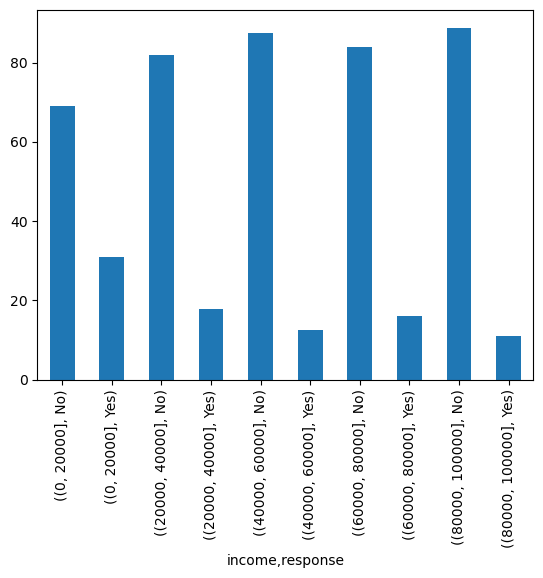

In [56]:
income_response.plot(kind="bar")

# Lab 4

In [57]:
# Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [58]:
df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [59]:
df["effective_to_date"] = df["effective_to_date"].astype("object")

In [60]:
df_num = df.select_dtypes(include = np.number)
df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')

In [61]:
df_cat = df.select_dtypes(include = np.object)
df_cat.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [62]:
# Now we will try to check the normality of the numerical variables visually
## Use seaborn library to construct distribution plots for the numerical variables

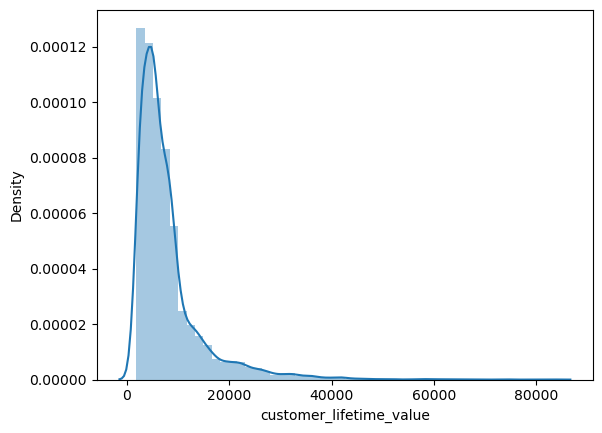

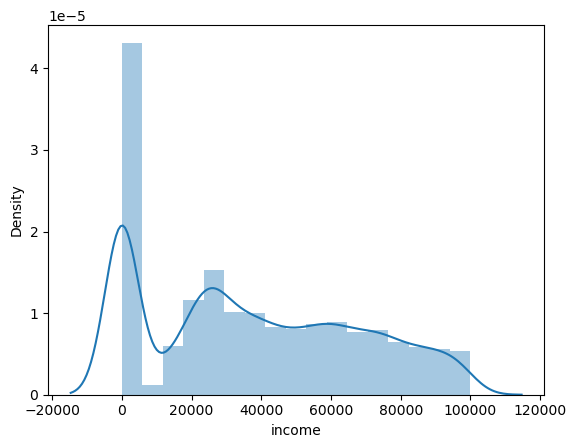

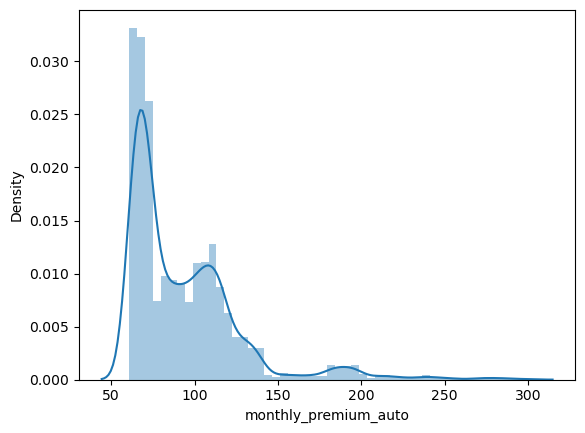

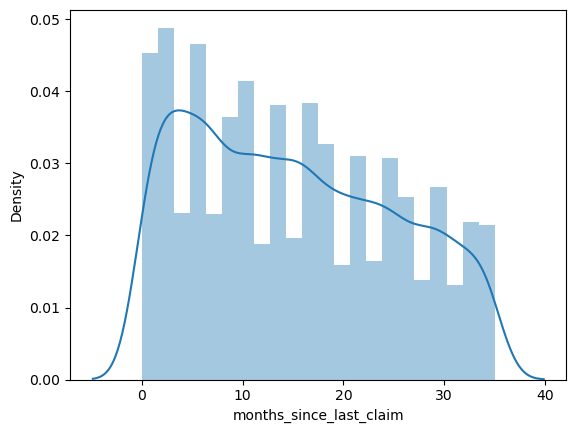

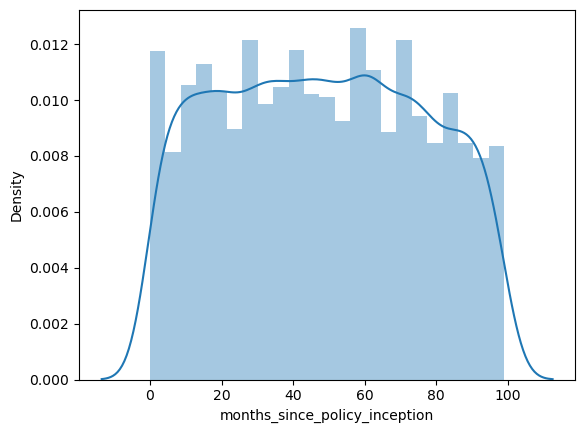

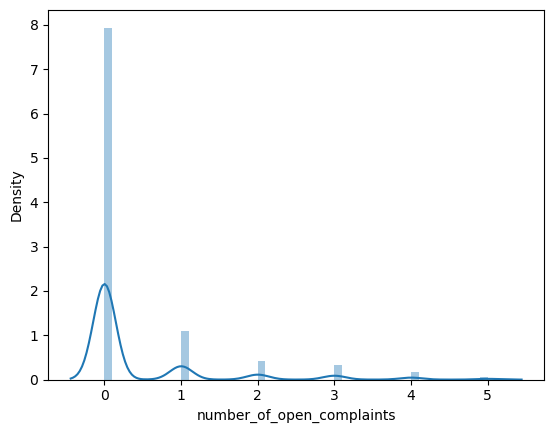

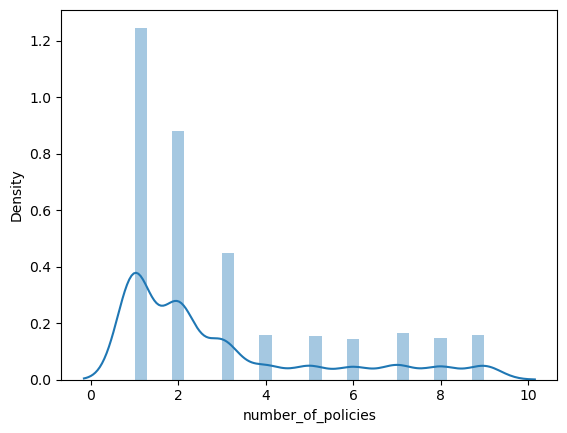

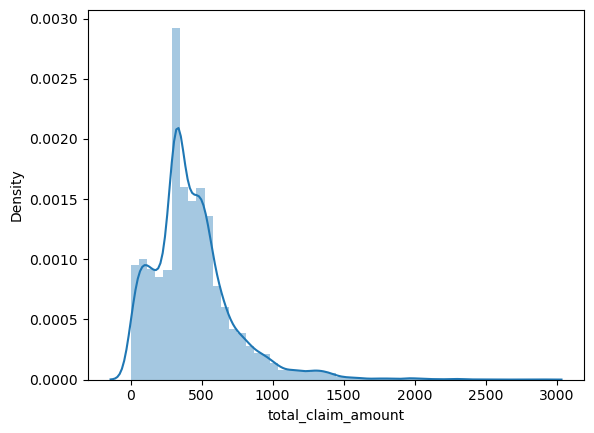

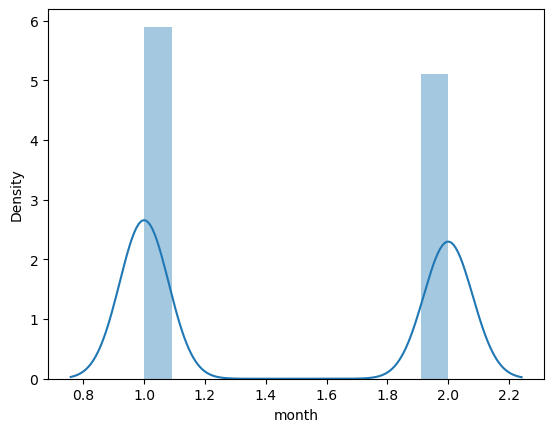

In [63]:
for column in df_num.columns:
    sns.distplot(df_num[column])
    plt.show()

In [64]:
## Use Matplotlib to construct histograms

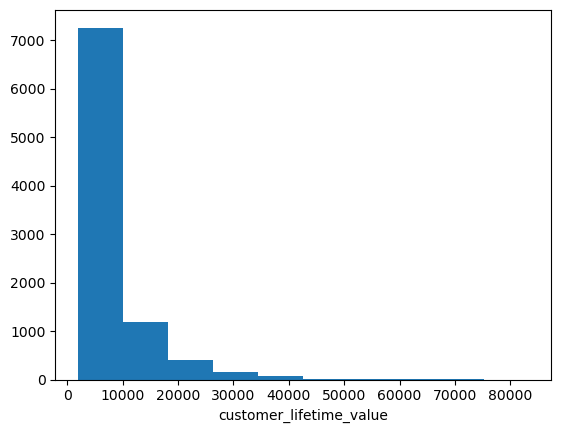

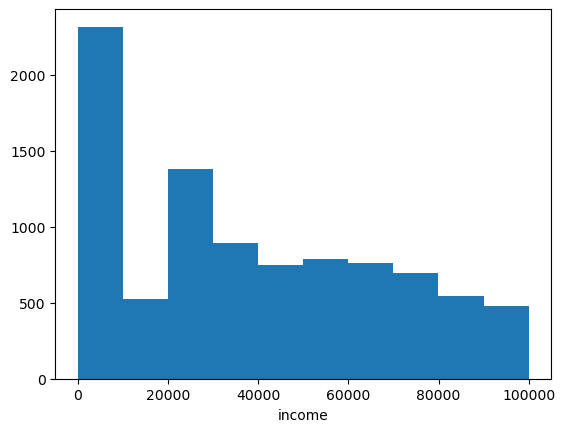

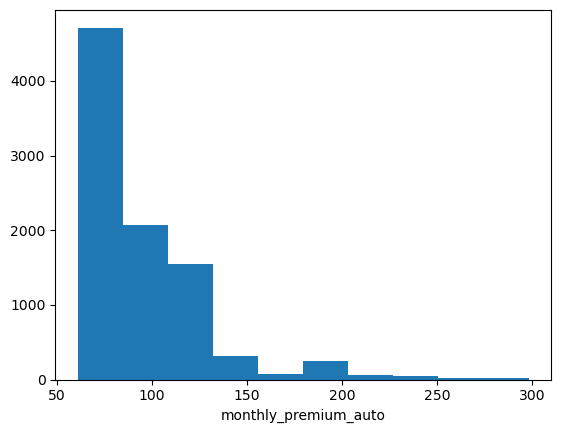

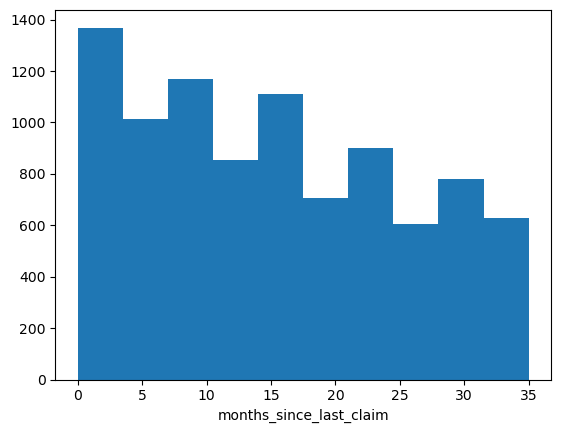

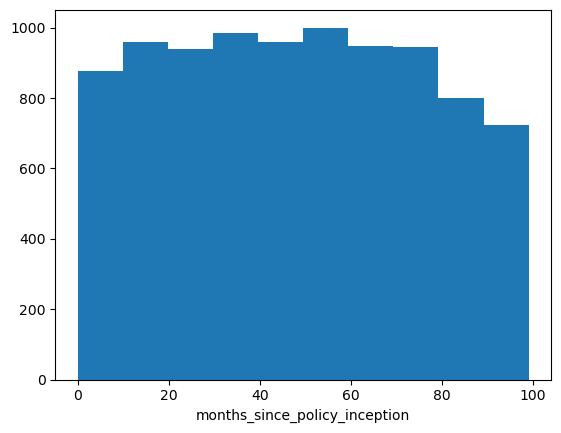

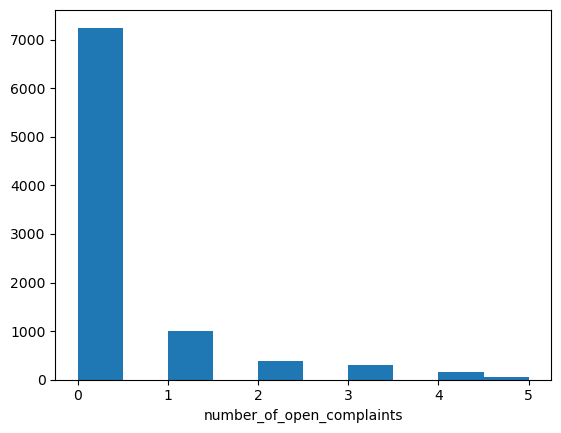

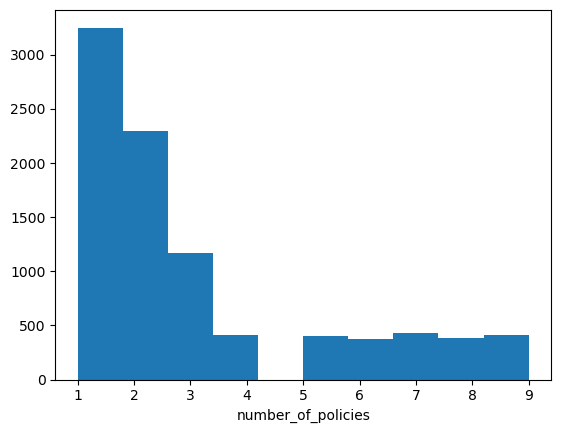

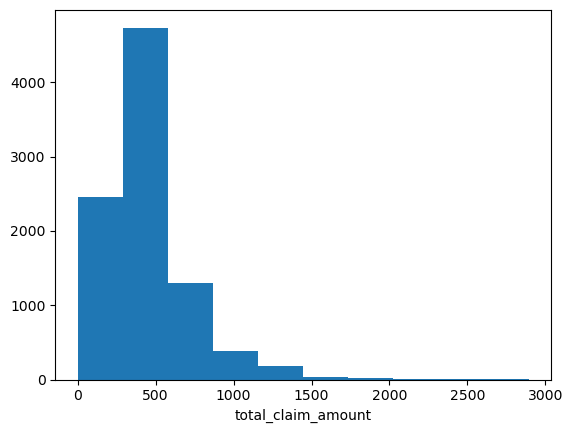

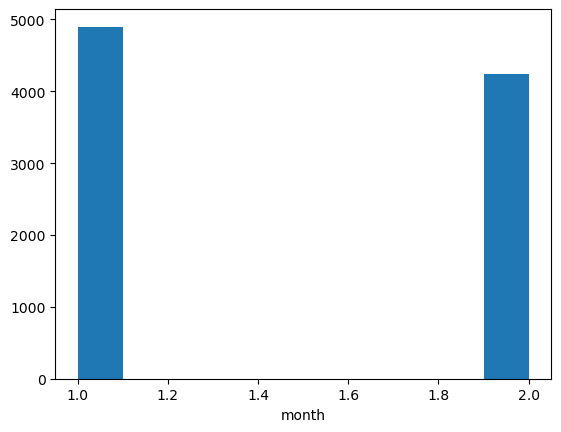

In [65]:
for column in df_num.columns:
    plt.hist(df_num[column])
    plt.xlabel(column)
    plt.show()

In [66]:
## Do the distributions for different numerical variables look like a normal distribution?

No

In [67]:
# For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [68]:
df_num_corr = df_num.corr()
df_num_corr = round(df_num_corr,2)
df_num_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23,-0.01
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36,0.00
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63,0.01
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01,-0.02
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00,0.01
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00,0.01
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00,0.01
month,-0.01,0.00,0.01,-0.02,0.01,-0.01,0.01,0.01,1.00


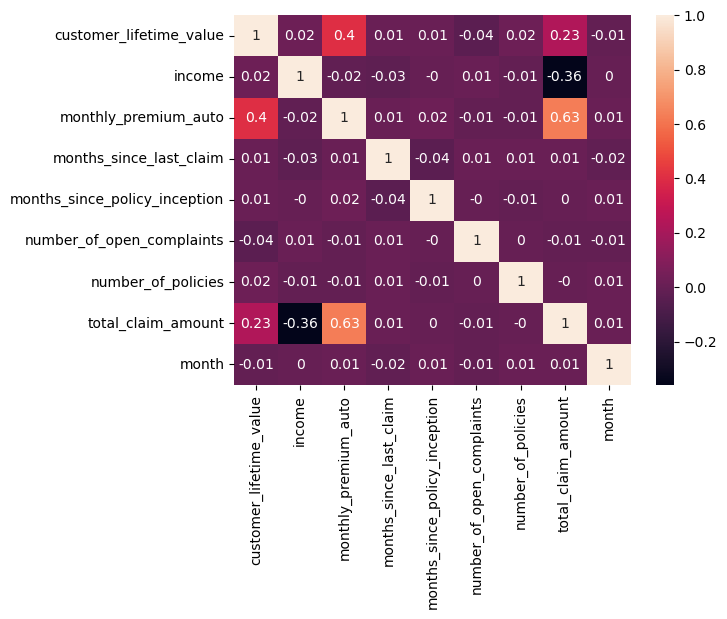

In [69]:
sns_plot = sns.heatmap(df_num_corr, annot=True)
plt.show()

In [70]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

There are no features with high correlation (greater than 0.9) between them. 

# Lab 5

In [71]:
# Processing Data
## X-y split.

In [72]:
y = df["total_claim_amount"]
X = df.drop(["total_claim_amount"], axis=1)
X.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24 00:00:00,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31 00:00:00,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19 00:00:00,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20 00:00:00,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03 00:00:00,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2


In [73]:
## Normalize (numerical).

In [74]:
X_num = X.select_dtypes(include = np.number)

In [75]:
transformer = MinMaxScaler().fit(X_num)
X_minmax = transformer.transform(X_num) 
X_num_norm = pd.DataFrame(X_minmax,columns= X_num.columns)
X_num_norm.head() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,1.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1.0


# Lab 6

In [76]:
## OneHot/Label Encoding (categorical).

In [77]:
df_cat.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24 00:00:00,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31 00:00:00,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19 00:00:00,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20 00:00:00,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03 00:00:00,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [78]:
df_cat.shape

(9134, 16)

In [79]:
df_cat["customer"].value_counts()

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

In [80]:
df_cat["effective_to_date"].value_counts()

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-31    178
2011-01-03    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-01-05    167
2011-02-27    167
2011-01-11    166
2011-02-04    164
2011-02-10    161
2011-02-28    161
2011-01-02    160
2011-01-21    160
2011-01-29    160
2011-02-22    158
2011-02-05    158
2011-02-03    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-02-01    154
2011-01-18    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-07    151
2011-01-25    151
2011-02-25    149
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-01-06    143
2011-02-23    143
2011-01-16    142
2011-02-16    139
2011-02-13    139
2011-02-24    139
2011-02-09    137
2011-02-17    136
2011-01-22    136
2011-02-08    134
2011-02-20

In [81]:
df_cat = df_cat.drop(["customer", "effective_to_date"], axis=1) # Drop these columns because there are too many categories

In [82]:
df_cat_dumm = pd.get_dummies(df_cat, drop_first=True)
df_cat_dumm.columns

Index(['state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_Yes', 'coverage_Extended', 'coverage_Premium',
       'education_College', 'education_Doctor',
       'education_High School or Below', 'education_Master',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_M',
       'location_code_Suburban', 'location_code_Urban',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Personal Auto', 'policy_type_Special Auto',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
       'policy_Special L2', 'policy_Special L3', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'vehicle_class_Luxury Car',
       'vehicle_class_

In [83]:
## Concat DataFrames

In [84]:
X = pd.concat([X_num_norm, df_cat_dumm], axis=1)
X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,state_California,state_Nevada,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,1.0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [85]:
# Linear Regression
## Train-test split.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
len (X)

9134

In [88]:
len(X_train)

6393

In [89]:
len(X_test)

2741

In [90]:
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,state_California,state_Nevada,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
434,0.038280,0.485762,0.291139,0.342857,0.151515,0.0,0.000,1.0,0,0,...,0,0,0,0,0,1,0,0,1,0
4641,0.039929,0.268821,0.295359,0.142857,0.020202,0.0,0.000,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
4952,0.036927,0.129045,0.329114,0.085714,0.515152,0.0,0.000,1.0,1,0,...,0,0,0,0,0,0,1,0,1,0
1489,0.081208,0.000000,0.253165,0.142857,0.949495,0.0,0.875,0.0,0,0,...,1,0,0,0,0,0,1,0,1,0
812,0.016954,0.702603,0.092827,0.371429,0.191919,0.2,0.000,1.0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [91]:
## Apply linear regression.

In [92]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [93]:
predictions  = model.predict(X_test)
predictions

array([191.3499199 , 459.81437779, 452.92620639, ..., 667.97712143,
       123.36755531, 581.59684476])

In [94]:
y_test

708     218.598065
47      447.793440
3995    451.200000
1513    355.641958
3686    470.097411
           ...    
4271    518.400000
7923    650.521790
5633    652.800000
8432    150.878447
681     452.616872
Name: total_claim_amount, Length: 2741, dtype: float64

In [95]:
# Model Validation
## R2, MSE, RMSE, MAE.

In [96]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

r2 =  0.7650140694511026
RMSE =  138.50239685288923
MSE =  19182.913933995223
MAE =  94.50011586128554


In [97]:
df["total_claim_amount"].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64